In [213]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set_style("darkgrid")

In [187]:
df=pd.read_csv("retail_2016_2017.csv")

In [188]:
sales=df.groupby(["family","store_nbr"])["sales"].sum().round()
sales

family      store_nbr
AUTOMOTIVE  1             2524.0
            2             3918.0
            3             6790.0
            4             2565.0
            5             3667.0
                          ...   
SEAFOOD     50           12774.0
            51           34251.0
            52            1219.0
            53            3745.0
            54            1082.0
Name: sales, Length: 1782, dtype: float64

In [189]:
sales.loc["AUTOMOTIVE":"BABY CARE",10:90]

family      store_nbr
AUTOMOTIVE  10           1772.0
            11           4387.0
            12           3507.0
            13           3499.0
            14           2858.0
                          ...  
BABY CARE   50              0.0
            51              0.0
            52              0.0
            53             22.0
            54            198.0
Name: sales, Length: 90, dtype: float64

In [190]:
sales=df.groupby(["family"],as_index=False).agg(sales_sum=("sales","sum"),sales_avg=("sales","mean")).round(1)

In [191]:
sales

,family,sales_sum,sales_avg
0,AUTOMOTIVE,226139.0,7.1
1,BABY CARE,7903.0,0.2
2,BEAUTY,166189.0,5.2
3,BEVERAGES,105700279.0,3306.4
4,BOOKS,6438.0,0.2
5,BREAD/BAKERY,17092978.1,534.7
6,CELEBRATION,444901.0,13.9
7,CLEANING,38127743.0,1192.7
8,DAIRY,28422893.0,889.1
9,DELI,9617776.8,300.9


In [192]:
sales.sort_values(by="sales_sum",ascending=False)

,family,sales_sum,sales_avg
12,GROCERY I,143227476.1,4480.3
3,BEVERAGES,105700279.0,3306.4
30,PRODUCE,73523507.3,2299.9
7,CLEANING,38127743.0,1192.7
8,DAIRY,28422893.0,889.1
5,BREAD/BAKERY,17092978.1,534.7
28,POULTRY,12375951.6,387.1
24,MEATS,11551425.8,361.3
25,PERSONAL CARE,10193693.0,318.9
9,DELI,9617776.8,300.9


In [193]:
df.assign(avg_sales=df.groupby("family")["sales"].transform("mean"),
          diff_sales=lambda x:x["sales"]-x["avg_sales"])

,id,date,store_nbr,family,sales,onpromotion,avg_sales,diff_sales
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,7.073918,-7.073918
1,1945945,2016-01-01,1,BABY CARE,0.000,0,0.247216,-0.247216
2,1945946,2016-01-01,1,BEAUTY,0.000,0,5.198605,-5.198605
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,3306.440159,-3306.440159
4,1945948,2016-01-01,1,BOOKS,0.000,0,0.201389,-0.201389
...,...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,387.135622,50.997378
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,103.479924,51.073076
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,2299.909514,119.819486
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,6.068381,114.931619


In [194]:
df.groupby("family")["sales"].agg("sum").round()

family
AUTOMOTIVE                       226139.0
BABY CARE                          7903.0
BEAUTY                           166189.0
BEVERAGES                     105700279.0
BOOKS                              6438.0
BREAD/BAKERY                   17092978.0
CELEBRATION                      444901.0
CLEANING                       38127743.0
DAIRY                          28422893.0
DELI                            9617777.0
EGGS                            6054283.0
FROZEN FOODS                    5176584.0
GROCERY I                     143227476.0
GROCERY II                       726125.0
HARDWARE                          41324.0
HOME AND KITCHEN I               989836.0
HOME AND KITCHEN II              886210.0
HOME APPLIANCES                   13526.0
HOME CARE                       9393716.0
LADIESWEAR                       368644.0
LAWN AND GARDEN                  323517.0
LINGERIE                         195700.0
LIQUOR,WINE,BEER                3006663.0
MAGAZINES                  

In [195]:
df.groupby("family")["sales"].transform("sum").round()

0             226139.0
1               7903.0
2             166189.0
3          105700279.0
4               6438.0
              ...     
1054939     12375952.0
1054940      3308046.0
1054941     73523507.0
1054942       193994.0
1054943       729149.0
Name: sales, Length: 1054944, dtype: float64

In [196]:
df.pivot_table(index="family",values="sales",aggfunc="sum",margins=True).round()

,sales
family,
AUTOMOTIVE,226139.0
BABY CARE,7903.0
BEAUTY,166189.0
BEVERAGES,105700279.0
BOOKS,6438.0
BREAD/BAKERY,17092978.0
CELEBRATION,444901.0
CLEANING,38127743.0
DAIRY,28422893.0


In [197]:
df.pivot_table(index="family",columns="store_nbr",values="sales",aggfunc="sum").round()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,2524.0,3918.0,6790.0,2565.0,3667.0,3442.0,3031.0,3225.0,7695.0,1772.0,...,9809.0,8670.0,9537.0,7264.0,7477.0,6702.0,4487.0,1497.0,5811.0,4199.0
BABY CARE,0.0,84.0,672.0,24.0,215.0,12.0,48.0,142.0,228.0,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,198.0
BEAUTY,1776.0,3824.0,8150.0,3063.0,3604.0,4524.0,2622.0,5942.0,4462.0,933.0,...,8068.0,8901.0,9766.0,8680.0,6603.0,6353.0,3566.0,972.0,3812.0,405.0
BEVERAGES,1238601.0,1915519.0,5280120.0,1742495.0,1110429.0,2477150.0,2612147.0,2948874.0,2218853.0,685311.0,...,5564655.0,3680161.0,5162704.0,3006995.0,4470550.0,2619648.0,2884739.0,537796.0,1396928.0,1186768.0
BOOKS,211.0,239.0,540.0,266.0,230.0,76.0,211.0,317.0,0.0,0.0,...,579.0,199.0,581.0,57.0,454.0,291.0,259.0,0.0,77.0,0.0
BREAD/BAKERY,223998.0,410154.0,805629.0,264225.0,209913.0,365313.0,465510.0,534130.0,339050.0,63886.0,...,787221.0,577221.0,734913.0,509099.0,777951.0,383754.0,534936.0,97521.0,313372.0,131379.0
CELEBRATION,9072.0,8342.0,29351.0,5931.0,15235.0,8932.0,11696.0,14258.0,9131.0,2373.0,...,23177.0,13178.0,17113.0,12845.0,21300.0,21917.0,9150.0,1343.0,6110.0,2892.0
CLEANING,390600.0,579198.0,1268147.0,522716.0,538626.0,760643.0,662558.0,773669.0,1078511.0,442035.0,...,1595863.0,1417153.0,1454345.0,1315531.0,1187930.0,992487.0,867712.0,201411.0,683924.0,688297.0
DAIRY,430983.0,579438.0,1427037.0,532893.0,326557.0,664470.0,876615.0,968274.0,547710.0,186123.0,...,1477538.0,988991.0,1429740.0,823365.0,1493050.0,714319.0,968845.0,140584.0,368223.0,151139.0


In [198]:
df.pivot_table(index="family",values="sales",aggfunc=["sum","max","mean"],margins=True).round()

,sum,max,mean
,sales,sales,sales
family,,,
AUTOMOTIVE,226139.0,255.0,7.0
BABY CARE,7903.0,22.0,0.0
BEAUTY,166189.0,136.0,5.0
BEVERAGES,105700279.0,25413.0,3306.0
BOOKS,6438.0,51.0,0.0
BREAD/BAKERY,17092978.0,3607.0,535.0
CELEBRATION,444901.0,457.0,14.0
CLEANING,38127743.0,11377.0,1193.0


In [199]:
pt=df.pivot_table(index="family",columns="store_nbr",values="sales",aggfunc="sum").round()

In [200]:
pt.reset_index(inplace=True)

In [201]:
pt.melt(id_vars="family",var_name="store_nbr",value_vars=[1,2,3,4],value_name="Sales")

,family,store_nbr,Sales
0,AUTOMOTIVE,1,2524.0
1,BABY CARE,1,0.0
2,BEAUTY,1,1776.0
3,BEVERAGES,1,1238601.0
4,BOOKS,1,211.0
...,...,...,...
127,POULTRY,4,275393.0
128,PREPARED FOODS,4,53123.0
129,PRODUCE,4,1533163.0
130,SCHOOL AND OFFICE SUPPLIES,4,278.0


In [202]:
df=pd.read_csv("transactions.csv")
(df["store_nbr"]==24).sum()

1577

In [203]:
transaction24=df[df["store_nbr"]==24]
transaction24

,date,store_nbr,transactions
21,2013-01-02,24,2605
67,2013-01-03,24,2462
113,2013-01-04,24,2607
159,2013-01-05,24,2578
205,2013-01-06,24,2061
...,...,...,...
83241,2017-08-11,24,2008
83295,2017-08-12,24,1943
83349,2017-08-13,24,1520
83403,2017-08-14,24,2092


<AxesSubplot:xlabel='date'>

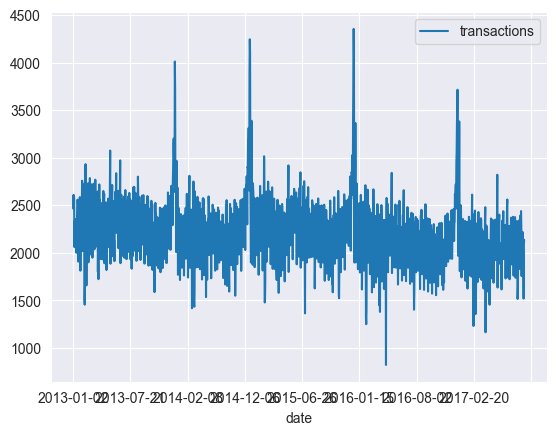

In [204]:
transaction24.plot(x="date",y="transactions")

In [205]:
df=pd.read_csv("oil.csv")
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [206]:
df.dropna(inplace=True)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1175 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB


In [208]:
df.head()

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [209]:
df["date"].str[:4].value_counts()

2013    252
2014    252
2015    252
2016    252
2017    167
Name: date, dtype: int64

<AxesSubplot:xlabel='date'>

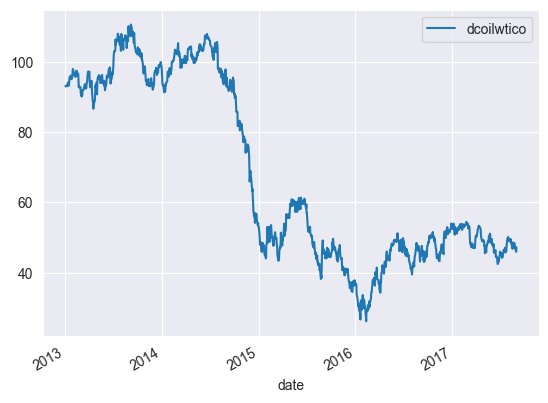

In [214]:
df.astype({"date":"datetime64"}).set_index("date").plot()